# 서울 대기오염 데이터 분석

## 데이터 도메인 파악

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 데이터로드
data = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Measurement_summary.csv")
data.shape

(647511, 11)

In [4]:
data.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


### 데이터 칼럼에 대한 도메인 지식 확보

- SO2 : 이산화 황은 화학식 SO₂인 무기 화합물이며, 아황산 가스, 무수 아황산이라고도 부른다. 산소 원자 2개와 황 원자 1개가 결합되어 있다. **색깔이 없으며 자극적인 냄새가 나는 유독성 기체**이다. 화산 활동이나 유기 물질이 분해될 때 자연적으로 생긴다.
    * <기준>
        - 좋음 : 0~0.03
        - 보통 : 0.031~0.06
        - 나쁨 : 0.061~0.2
        - 매우나쁨 : 0.201이상

- NO2 : 이산화 질소는 질소와 산소로 이루어진 화합물이다. 분자식은 NO₂이다. 산화 질소(IV), 과산화 질소라고도 하는데, 사산화 이질소 역시 이 명칭으로 불릴 수 있다. **독성이 있는 적갈색의 기체이다.** 
    * <기준>
        - 좋음 : 0~0.02
        - 보통 : 0.021~0.05
        - 나쁨 : 0.051~0.15
        - 매우나쁨 : 0.151이상

- O3 : 오존은 일반 산소보다 산화력이 훨씬 강해 살균, 악취 제거에 이용된다. 흔하지는 않지만 부산이나 대구 상수도의 소독에도 쓰인다. **0.1%이상의 고농도 오존은 매우 위험**한데, 오존발생기를 통과하여 일부가 오존으로 변한 산소 플로우에 라텍스나 네오프렌으로 된 실험용 장갑을 갖다대면 몇 초만에 삭아 걸레짝이 될 정도로 높다.
    * <기준>
        - 좋음 : 0~0.030
        - 보통 : 0.031~0.090
        - 나쁨 : 0.091~0.150
        - 매우나쁨 : 0.151이상
        
- CO : 일산화탄소. 가연성이며 독성이 있어서 취급에 주의가 필요하다. 산소보다 헤모글로빈과의 친화력이 200배 정도 더 좋기 때문에 소량 흡입시에도 호흡 대사를 방해하여 생명 유지가 어려울 수 있으므로 주의해야 한다.
    * <기준>
        - 좋음 : 0~2
        - 보통 : 2.01~9
        - 나쁨 : 9.01~15
        - 매우나쁨 : 15.01이상
        
- PM10 : 지름이 10마이크로센치인 부유먼지 => 상기도까지 감염
    - 토양성분이 주를 이루는 황사같은 것
- PM2.5 : 지름이 2.5마이크로센치인 미세먼지 => 폐의 폐포까지 감염(더 깊게 감염됨)
    - 발전소나 공장, 자동차와 같은 오염원
    * <기준>
        - 좋음 : 0~30
        - 보통 : 31~80
        - 나쁨 : 81~150
        - 매우나쁨 : 151이상
* 참고로 미세먼지는 PM1.0 또는 PM0.5로 나타냄         


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [6]:
# 칼럼명 한국어로 바꾸기
data.columns = ['측정일자','station_code','주소','위도','경도','아황산가스','이산화질소',
               '오존','일산화탄소','부유먼지','미세먼지']

In [7]:
data.head(1)

,측정일자,station_code,주소,위도,경도,아황산가스,이산화질소,오존,일산화탄소,부유먼지,미세먼지
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0


In [8]:
# station_code 칼럼 종류보고 필요있는 칼럼인지 판단 => 서울 내부 세부적인 지역에 따라 구분
data['station_code'].unique()

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125],
      dtype=int64)

In [9]:
# station_code 칼럼 삭제
data = data.drop('station_code', axis=1)
data.head(1)

,측정일자,주소,위도,경도,아황산가스,이산화질소,오존,일산화탄소,부유먼지,미세먼지
0,2017-01-01 00:00,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0


In [10]:
# 측정일자 Datetime으로 변환
# 00:00 이것 때문에 바로 datatime 변화불가라 split으로 나누고 날짜에 해당하는 부분만 출력
# 그리고 datetime으로 변환
data['측정일자'] =data['측정일자'].str.split(" ", expand=True)[0]
data['측정일자'] = pd.to_datetime(data['측정일자'])
data.dtypes

측정일자     datetime64[ns]
주소               object
위도              float64
경도              float64
아황산가스           float64
이산화질소           float64
오존              float64
일산화탄소           float64
부유먼지            float64
미세먼지            float64
dtype: object

In [11]:
# '주소' 칼럼에서 구군 칼럼 추가
data['구군'] = data['주소'].str.split(",", expand=True)[2]
data.head(1)

,측정일자,주소,위도,경도,아황산가스,이산화질소,오존,일산화탄소,부유먼지,미세먼지,구군
0,2017-01-01,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0,Jongno-gu


In [12]:
# '주소' 칼럼에서 시도인 'Seoul'만 빼서 새로운 칼럼 '시도'에 넣기
data['시도'] = data['주소'].str.split(",",expand=True)[3]
data.head(1)

,측정일자,주소,위도,경도,아황산가스,이산화질소,오존,일산화탄소,부유먼지,미세먼지,구군,시도
0,2017-01-01,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0,Jongno-gu,Seoul


In [14]:
# 데이터 결측치 확인
data.isnull().sum()

# 결측치 없음

측정일자     0
주소       0
위도       0
경도       0
아황산가스    0
이산화질소    0
오존       0
일산화탄소    0
부유먼지     0
미세먼지     0
구군       0
시도       0
dtype: int64

In [16]:
# 측정일자에서 년도/월 새로운 칼럼 2개 만들기
data['연도'] = data['측정일자'].dt.year
data['월'] = data['측정일자'].dt.month
data.head(1)

,측정일자,주소,위도,경도,아황산가스,이산화질소,오존,일산화탄소,부유먼지,미세먼지,구군,시도,연도,월
0,2017-01-01,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0,Jongno-gu,Seoul,2017,1


In [19]:
# 몇년도부터 몇년치의 데이터가 있는지 보기
print(data['연도'].unique())

[2017 2018 2019]


In [22]:
# 서울시 내 몇 개의 구군이 있는지 확인
print(data['구군'].unique())

[' Jongno-gu' ' Jung-gu' ' Yongsan-gu' ' Eunpyeong-gu' ' Seodaemun-gu'
 ' Mapo-gu' ' Seongdong-gu' ' Gwangjin-gu' ' Dongdaemun-gu' ' Jungnang-gu'
 ' Seongbuk-gu' ' Gangbuk-gu' ' Dobong-gu' ' Nowon-gu' ' Yangcheon-gu'
 ' Gangseo-gu' ' Guro-gu' ' Geumcheon-gu' ' Yeongdeungpo-gu' ' Dongjak-gu'
 ' Gwanak-gu' ' Seocho-gu' ' Gangnam-gu' ' Songpa-gu' ' Gangdong-gu']


In [23]:
# 구군 값(문자열)에 공백이 있는 거 같으 strip함수로 한 번 없애주고 확인
data['구군'] = data['구군'].str.strip()
data['구군'].unique()

array(['Jongno-gu', 'Jung-gu', 'Yongsan-gu', 'Eunpyeong-gu',
       'Seodaemun-gu', 'Mapo-gu', 'Seongdong-gu', 'Gwangjin-gu',
       'Dongdaemun-gu', 'Jungnang-gu', 'Seongbuk-gu', 'Gangbuk-gu',
       'Dobong-gu', 'Nowon-gu', 'Yangcheon-gu', 'Gangseo-gu', 'Guro-gu',
       'Geumcheon-gu', 'Yeongdeungpo-gu', 'Dongjak-gu', 'Gwanak-gu',
       'Seocho-gu', 'Gangnam-gu', 'Songpa-gu', 'Gangdong-gu'],
      dtype=object)

### 서울시 내 구군별로 어떤 대기오염이 심한지 나타내보자

In [25]:
data.columns

Index(['측정일자', '주소', '위도', '경도', '아황산가스', '이산화질소', '오존', '일산화탄소', '부유먼지',
       '미세먼지', '구군', '시도', '연도', '월'],
      dtype='object')

In [27]:
# 경고메세지 무시
import warnings
warnings.filterwarnings(action='ignore')

In [37]:
# 대기(air)성분, 구군별로 그룹핑해 대기성분의 평균값으로 집계한 데이터프레임 만들기 - stack버젼 -> plot에 적합
df_gu = data.groupby(['구군'])['아황산가스', '이산화질소', '오존', '일산화탄소', '부유먼지',
       '미세먼지'].mean()
df_gu.head()

,아황산가스,이산화질소,오존,일산화탄소,부유먼지,미세먼지
구군,,,,,,
Dobong-gu,0.000913,0.018949,0.023604,0.572814,43.294415,25.733277
Dongdaemun-gu,-0.014647,0.009495,0.002446,0.490542,38.269958,22.692596
Dongjak-gu,-0.000509,0.027914,0.022945,0.470626,41.655441,24.373021
Eunpyeong-gu,-0.010560,0.009730,0.012924,0.526560,42.328468,24.890639
Gangbuk-gu,0.002712,0.021196,0.027543,0.462328,38.830643,21.726093


In [38]:
# 그래프 폰트 설정
plt.rc("font", family='Malgun Gothic')

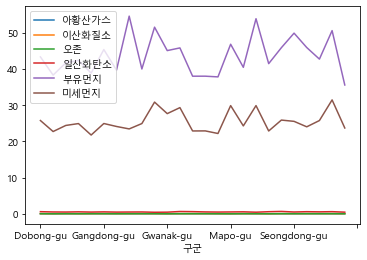

In [41]:
df_gu.plot()

In [32]:
# 대기(air)성분, 구군별로 그룹핑해 대기성분의 평균값으로 집계한 데이터프레임 만들기 - unstack버전 -> seaborn에 적합
df_gu = data.groupby(['구군'])['아황산가스', '이산화질소', '오존', '일산화탄소', '부유먼지',
       '미세먼지'].mean().unstack()
df_air_gu = pd.DataFrame(df_gu).reset_index()
df_air_gu.head()

,level_0,구군,0
0,아황산가스,Dobong-gu,0.000913
1,아황산가스,Dongdaemun-gu,-0.014647
2,아황산가스,Dongjak-gu,-0.000509
3,아황산가스,Eunpyeong-gu,-0.010560
4,아황산가스,Gangbuk-gu,0.002712


In [33]:
# 칼럼명 수정
df_air_gu.columns = ['대기성분','구군','평균']
df_air_gu.head()

,대기성분,구군,평균
0,아황산가스,Dobong-gu,0.000913
1,아황산가스,Dongdaemun-gu,-0.014647
2,아황산가스,Dongjak-gu,-0.000509
3,아황산가스,Eunpyeong-gu,-0.010560
4,아황산가스,Gangbuk-gu,0.002712


In [45]:
# 평균값 연산이 너무 오래걸릴 것 같으므로 소수 3번째짜리까지만 짜르자
df_air_gu['평균'] = df_air_gu['평균'].round(decimals=3)
df_air_gu.head()

,대기성분,구군,평균
0,아황산가스,Dobong-gu,0.001
1,아황산가스,Dongdaemun-gu,-0.015
2,아황산가스,Dongjak-gu,-0.001
3,아황산가스,Eunpyeong-gu,-0.011
4,아황산가스,Gangbuk-gu,0.003


In [50]:
# seaborn 임포트
import seaborn as sns

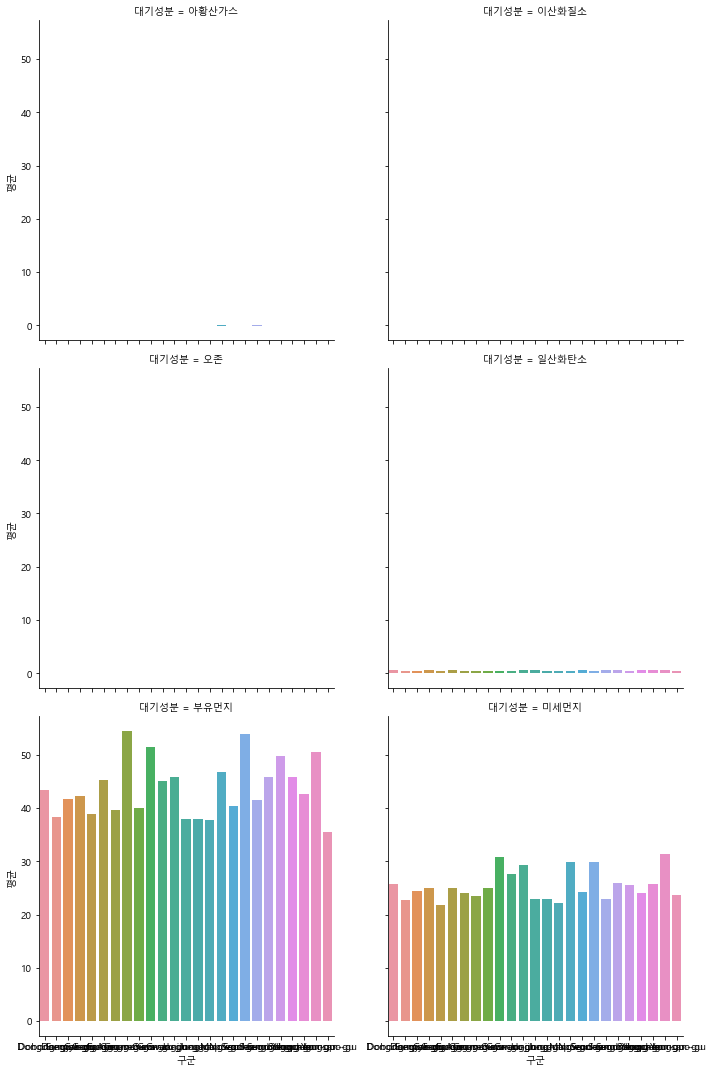

In [56]:
# catplot으로 시도 -> 대기성분별로 수치가 평균값의 수치가 너무 달라서 그래프 시각화가 안좋아보임
sns.catplot(data=df_air_gu, x='구군', y='평균',col='대기성분', col_wrap=2, ci=None, kind='bar')

In [64]:
# 대기성분별로 나누어서 시각화하기
# 1. 아황산가스
df_SO2 = df_air_gu[df_air_gu['대기성분'] == '아황산가스']
df_SO2.head()

,대기성분,구군,평균
0,아황산가스,Dobong-gu,0.001
1,아황산가스,Dongdaemun-gu,-0.015
2,아황산가스,Dongjak-gu,-0.001
3,아황산가스,Eunpyeong-gu,-0.011
4,아황산가스,Gangbuk-gu,0.003


In [74]:
# seaborn의 set를 이용해서 폰트, 그래프 배경스타일, unicode_minus 설정
sns.set(style='whitegrid',
       font='Malgun Gothic',
       rc={'axes.unicode_minus':False})

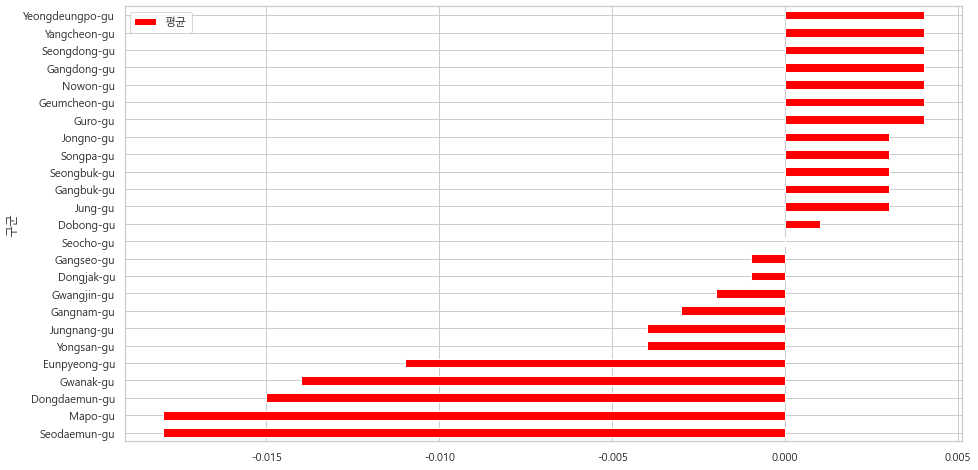

In [83]:
df_SO2.sort_values(by=['평균']).plot.barh(x='구군', y='평균', figsize=(15,8), color='red')

# 위에 그래프 평균값말고 중앙값이나 최대값 이런걸로 해보기..

In [ ]:
# 다른 질병으로도 